# Mini-projet COCOMA - Allocation de resssources
### - Antonin ARBERET  
### - Asma BRAZI 

Le mini-projet consiste simplement à produire un notebook qui permettra d'illustrer deux protocoles pour la coordination à base d'enchères:

- les protocoles SSI (version classique et regret)

- le protocole CBAA 

On s'inspirera de la fiche exemple donnée en pdf. Pour les deux protocoles, les agents/robots doivent être situés sur un graphe, dont les arcs sont valués (distance).

In [1]:
from problem import Problem
from utils import *
import numpy as np
import sys
from IPython.display import Image
import pandas as pd

## 1. Les protocoles SSI

Deux agents : robots r1 et r2 sont disposes sur un terrain en forme de grille et doivent visiter plusieurs objectifs (o1, o2, o3, o4), sans revenir à leur position initiale. On utilisera ici la distancede Manhattan. 

On s’interesse aux approches basees sur les enchères, où les robots effectuent des offres sur les objectifs à visiter.

###  1.1 Modélisation du problème
Les agents et les objectifs à visiter sont stockés dans des tableaux à une dimension. Nous définissons aussi une grille à NxM dimension où les agents et les objectifs seront placés. Cette grille sert à un agent donné à calculer la distance entre sa position, et la position d'un objectif donné. Cette distance sera donc le bid à proposer.

###  1.2 Expérimentation

####  1.2.1 Problème 1
En premier temps, nous étudions problème à deux agents r1 et r2, disposant de 4 objectifs à visiter. La grille ci-dessous montre les positions occupées par les robots et les objectifs.

In [2]:
agents=["r1","r2"]
resources=["o1","o2","o3","o4"]

grid=np.empty([8, 8], dtype = object)

grid[2][2]="o2"
grid[2][4]="o4"
grid[4][4]="r2"
grid[5][5]="o1"
grid[5][2]="r1"
grid[7][4]="o3"
grid


array([[None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None],
       [None, None, 'o2', None, 'o4', None, None, None],
       [None, None, None, None, None, None, None, None],
       [None, None, None, None, 'r2', None, None, None],
       [None, None, 'r1', None, None, 'o1', None, None],
       [None, None, None, None, None, None, None, None],
       [None, None, None, None, 'o3', None, None, None]], dtype=object)

#### Version classique

In [3]:
ssi(grid,agents,resources)

Round: 0
Available resources:  ['o1' 'o2' 'o3' 'o4']
Resource:  o1  ==> Agent:  r2 

Round: 1
Available resources:  ['o2' 'o3' 'o4']
Resource:  o2  ==> Agent:  r1 

Round: 2
Available resources:  ['o3' 'o4']
Resource:  o3  ==> Agent:  r2 

Round: 3
Available resources:  ['o4']
Resource:  o4  ==> Agent:  r1 

-- Solution --
Agent Resources
   r1  [o2, o4]
   r2  [o1, o3]


#### Version regret

In [4]:
ssi_regret(grid,agents,resources)

Round: 0
Available resources:  ['o1', 'o2', 'o3', 'o4']
Resource:  o4  ==> Agent:  r2 



Round: 1
Available resources:  ['o1', 'o2', 'o3']
Resource:  o1  ==> Agent:  r1 



Round: 2
Available resources:  ['o2', 'o3']
Resource:  o2  ==> Agent:  r2 



Round: 3
Available resources:  ['o3']
Resource:  o3  ==> Agent:  r1 



-- Solution --
Agent Resources
   r1  [o1, o3]
   r2  [o4, o2]


La version regret nous retourne le même résultat que la version classique. Ceci est dû au fait qu'en cas d'égalité entre les evaluations sur une ressource donnée, l'odre lexicographique est respecté, contrairement au cours où nous avons pris comme mesure l'agent ayant effectuant l'offre la plus basse.

####  1.2.2 Problème 2
Nous reproduisons l'exemple cité dans le papier "The Power of Sequential Single-Item Auctions for Agent CoordinationS. Koenig et al". Deux agents r1 et r2 explorent 4 lieux.

#### Version classique

In [5]:
agents=["r1","r2"]
resources=["o1","o2","o3","o4"]

grid=np.empty([3, 8], dtype = object)

grid[0][0]="o4"
grid[0][4]="r1"
grid[0][7]="o1"
grid[2][0]="o3"
grid[2][4]="r2"
grid[2][7]="o2"


grid


array([['o4', None, None, None, 'r1', None, None, 'o1'],
       [None, None, None, None, None, None, None, None],
       ['o3', None, None, None, 'r2', None, None, 'o2']], dtype=object)

In [6]:
ssi(grid,agents,resources)

Round: 0
Available resources:  ['o1' 'o2' 'o3' 'o4']
Resource:  o1  ==> Agent:  r1 

Round: 1
Available resources:  ['o2' 'o3' 'o4']
Resource:  o2  ==> Agent:  r1 

Round: 2
Available resources:  ['o3' 'o4']
Resource:  o3  ==> Agent:  r2 

Round: 3
Available resources:  ['o4']
Resource:  o4  ==> Agent:  r2 

-- Solution --
Agent Resources
   r1  [o1, o2]
   r2  [o3, o4]


Nous retrouvons le même résultat que celui obtenu dans l'article (page 1628 exemple : Exploration Task 3)

#### Version regret

In [7]:
ssi_regret(grid,agents,resources)

Round: 0
Available resources:  ['o1', 'o2', 'o3', 'o4']
Resource:  o1  ==> Agent:  r1 



Round: 1
Available resources:  ['o2', 'o3', 'o4']
Resource:  o3  ==> Agent:  r2 



Round: 2
Available resources:  ['o2', 'o4']
Resource:  o4  ==> Agent:  r2 



Round: 3
Available resources:  ['o2']
Resource:  o2  ==> Agent:  r1 



-- Solution --
Agent Resources
   r1  [o1, o2]
   r2  [o3, o4]


####  1.2.3 Problème 3
Considérons un problème à deux agents r1 et r2, disposant de 5 objectifs à visiter.

In [8]:
agents=["r1","r2"]
resources=["o1","o2"]

grid=np.empty([1, 4], dtype = object)

grid[0][0]="o1"
grid[0][1]="r1"
grid[0][2]="o2"
grid[0][3]="r2"


grid


array([['o1', 'r1', 'o2', 'r2']], dtype=object)

#### Version classique

In [9]:
ssi(grid,agents,resources)

Round: 0
Available resources:  ['o1' 'o2']
Resource:  o1  ==> Agent:  r1 

Round: 1
Available resources:  ['o2']
Resource:  o2  ==> Agent:  r1 

-- Solution --
Agent Resources
   r1  [o1, o2]
   r2        []


#### Version regret

In [10]:
ssi_regret(grid,agents,resources)

Round: 0
Available resources:  ['o1', 'o2']
Resource:  o1  ==> Agent:  r1 



Round: 1
Available resources:  ['o2']
Resource:  o2  ==> Agent:  r2 



-- Solution --
Agent Resources
   r1      [o1]
   r2      [o2]


L'exemple 3 montre la différence entre les deux versions classique et regret de SSI. Avec la version classique, le robot 1 prend les deux objectifs. Or, la version avec regret attribue à r1 l'objectif o1 et à r2 l'objectif o2. 

La version classique attribue l'objectif o2 à r1 car les deux robots propose la même offre sur cet objectif, mais le robot 1 est privilégié car nous considérons l'ordre lexicographique en cas d'égalité, mais aussi la méthode prime. 
Or, La version regret attribue l'objectif o2 à r2 car r1 aurait déjà pris o1 dans un premier tour, s'il doit ensuite visiter o2 ça lui coûte 2 unité en partant de o2 ou bien aussi 2 unité en visitant o2 d'abord ensuite o1. Cependant, le robot r1 étant toujours à sa case de départ, ça lui coûte uniquement 1 unité pour visiter o2.

## 2. Le protocoles CBAA

###  2.1 Modélisation du problème
En plus des agents et des ressources à se partager, nou stockons aussi le tableau des utilités de ces agents. De plus, il est important de définir les voisins de chaque agent avec qui il va communiquer son choix et apprendre le choix des autres. 



###  2.2 Expérimentation

####  2.2.1 Problème 1
Nous condidérons 4 agents et 4 ressources. Le graphe ci-dessous montre les relations de voisinage entre les agents.

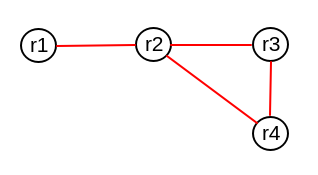

In [11]:
 Image("cbaa1.png")

In [12]:
agents=["r1","r2","r3","r4"]
resources=["o1","o2","o3","o4"]
utilities=[[5,1,2,3],[1,3,6,1],[1,2,5,3],[8,1,1,1]]
neighbours=[["r2"],["r1","r3","r4"],["r2","r4"],["r2","r3"]]


In [13]:
cbaa(agents,resources,utilities,neighbours)

Round:  0
Agent:  r1  :  resource  o1
Agent:  r2  :  resource  o3
Agent:  r3  :  resource  o3
Agent:  r4  :  resource  o1


Round:  1
Agent:  r1  :  resource  o1
Agent:  r2  :  resource  o3
Agent:  r3  :  resource  o4
Agent:  r4  :  resource  o1


Round:  2
Agent:  r1  :  resource  o4
Agent:  r2  :  resource  o3
Agent:  r3  :  resource  o4
Agent:  r4  :  resource  o1


Round:  3
Agent:  r1  :  resource  o4
Agent:  r2  :  resource  o3
Agent:  r3  :  resource  o2
Agent:  r4  :  resource  o1


----------- Solution ------------
Agent Resource  Utility  Bid
   r1       o4        3    1
   r2       o3        6    3
   r3       o2        2    1
   r4       o1        8    7
Utilité totale :  19


####  2.2.2 Problème 2
Prenons un autre exemple où les agents forment une chaine. Nous condidérons 5 agents et 5 ressources:

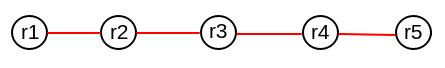

In [14]:
 Image("cbaa2.png")

In [15]:
agents=["r1","r2","r3","r4","r5"]
resources=["o1","o2","o3","o4","o5"]
utilities=[[5,1,2,3,1],[1,3,6,1,4],[1,2,5,3,4],[8,1,1,1,9],[8,1,1,1,9]]
neighbours=[["r2"],["r1","r3"],["r2","r4"],["r3","r5"],["r4"]]

In [16]:
cbaa(agents,resources,utilities,neighbours)

Round:  0
Agent:  r1  :  resource  o1
Agent:  r2  :  resource  o3
Agent:  r3  :  resource  o3
Agent:  r4  :  resource  o5
Agent:  r5  :  resource  o5


Round:  1
Agent:  r1  :  resource  o1
Agent:  r2  :  resource  o3
Agent:  r3  :  resource  o5
Agent:  r4  :  resource  o5
Agent:  r5  :  resource  o1


Round:  2
Agent:  r1  :  resource  o1
Agent:  r2  :  resource  o3
Agent:  r3  :  resource  o5
Agent:  r4  :  resource  o1
Agent:  r5  :  resource  o1


Round:  3
Agent:  r1  :  resource  o1
Agent:  r2  :  resource  o3
Agent:  r3  :  resource  o5
Agent:  r4  :  resource  o1
Agent:  r5  :  resource  o2


Round:  4
Agent:  r1  :  resource  o1
Agent:  r2  :  resource  o3
Agent:  r3  :  resource  o5
Agent:  r4  :  resource  o1
Agent:  r5  :  resource  o2


Round:  5
Agent:  r1  :  resource  o4
Agent:  r2  :  resource  o3
Agent:  r3  :  resource  o5
Agent:  r4  :  resource  o1
Agent:  r5  :  resource  o2


Round:  6
Agent:  r1  :  resource  o4
Agent:  r2  :  resource  o3
Agent:  r3  :  resourc

Cet exemple représente le pire cas en terme de nombre de d'aretes entre les voisins, soit le minimum possible. L'exécution du CBAA prend naturellement plus de temps à converger. Car si n est le nombre d'agent, les agents qui sont aux bouts de la chaine doivent attendre n-1 envois de message venant du bout opposé pour leur arriver et apprendre le bid de l'agent sur l'autre extrémité. 